<a href="https://colab.research.google.com/github/Suratan63011017/LinearAlgebraProject/blob/main/linearAlgebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
import warnings
warnings.filterwarnings('ignore')
uploaded = files.upload()
sns.set()

Saving diabetes.csv to diabetes (1).csv


In [35]:
import io
diabetes_data = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [36]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [37]:
print(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [38]:
diabetes_data = diabetes_data.drop(columns=['SkinThickness','Insulin'])
diabetes_data


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,33.6,0.127,47,1
1,0,84,82,38.2,0.233,23,0
2,0,145,0,44.2,0.630,31,1
3,0,135,68,42.3,0.365,24,1
4,1,139,62,40.7,0.536,21,0
...,...,...,...,...,...,...,...
1995,2,75,64,29.7,0.370,33,0
1996,8,179,72,32.7,0.719,36,1
1997,6,85,78,31.2,0.382,42,0
1998,0,129,110,67.1,0.319,26,1


In [39]:
diabetes_data = diabetes_data.drop(diabetes_data.index[diabetes_data['BloodPressure']==0])
diabetes_data = diabetes_data.drop(diabetes_data.index[diabetes_data['BMI']==0])
diabetes_data = diabetes_data.drop(diabetes_data.index[diabetes_data['Glucose']==0])
diabetes_data

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,33.6,0.127,47,1
1,0,84,82,38.2,0.233,23,0
3,0,135,68,42.3,0.365,24,1
4,1,139,62,40.7,0.536,21,0
5,0,173,78,46.5,1.159,58,0
...,...,...,...,...,...,...,...
1995,2,75,64,29.7,0.370,33,0
1996,8,179,72,32.7,0.719,36,1
1997,6,85,78,31.2,0.382,42,0
1998,0,129,110,67.1,0.319,26,1


In [40]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1888 non-null   int64  
 1   Glucose                   1888 non-null   int64  
 2   BloodPressure             1888 non-null   int64  
 3   BMI                       1888 non-null   float64
 4   DiabetesPedigreeFunction  1888 non-null   float64
 5   Age                       1888 non-null   int64  
 6   Outcome                   1888 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 118.0 KB


In [41]:
print(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [42]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1888.0,3.742055,3.304971,0.000,1.000,3.00,6.000,17.00
Glucose,1888.0,122.163665,30.784603,44.000,99.000,117.00,142.000,199.00
BloodPressure,1888.0,72.423729,12.255992,24.000,64.000,72.00,80.000,122.00
BMI,1888.0,32.655508,7.196732,18.200,27.500,32.40,36.800,80.60
DiabetesPedigreeFunction,1888.0,0.472931,0.323601,0.078,0.245,0.38,0.624,2.42
Age,1888.0,33.217691,11.780350,21.000,24.000,29.00,40.250,81.00
Outcome,1888.0,0.338453,0.473309,0.000,0.000,0.00,1.000,1.00


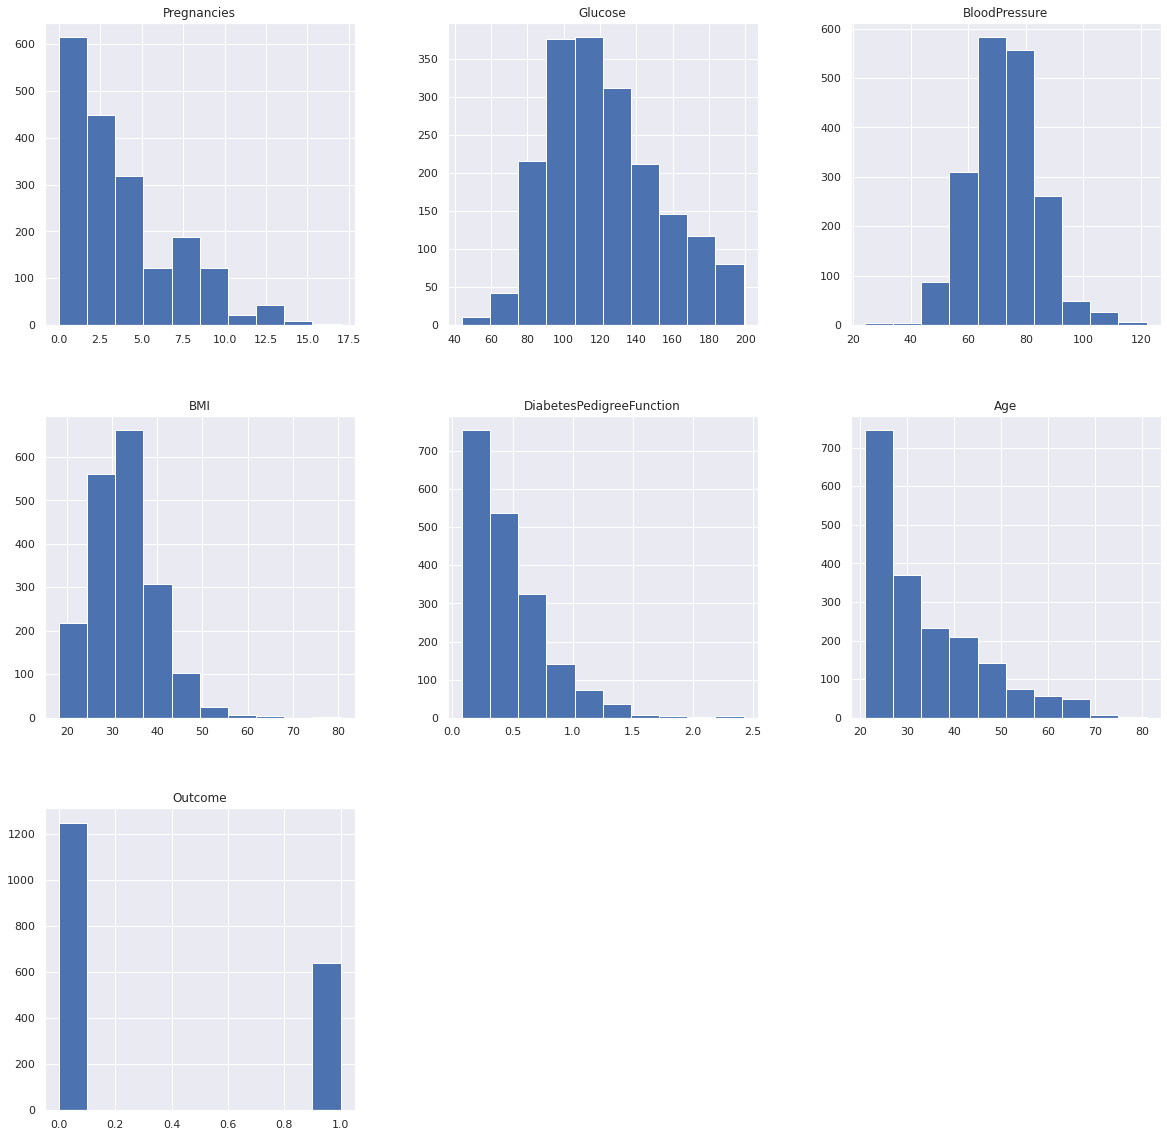

In [43]:
p = diabetes_data.hist(figsize = (20,20))

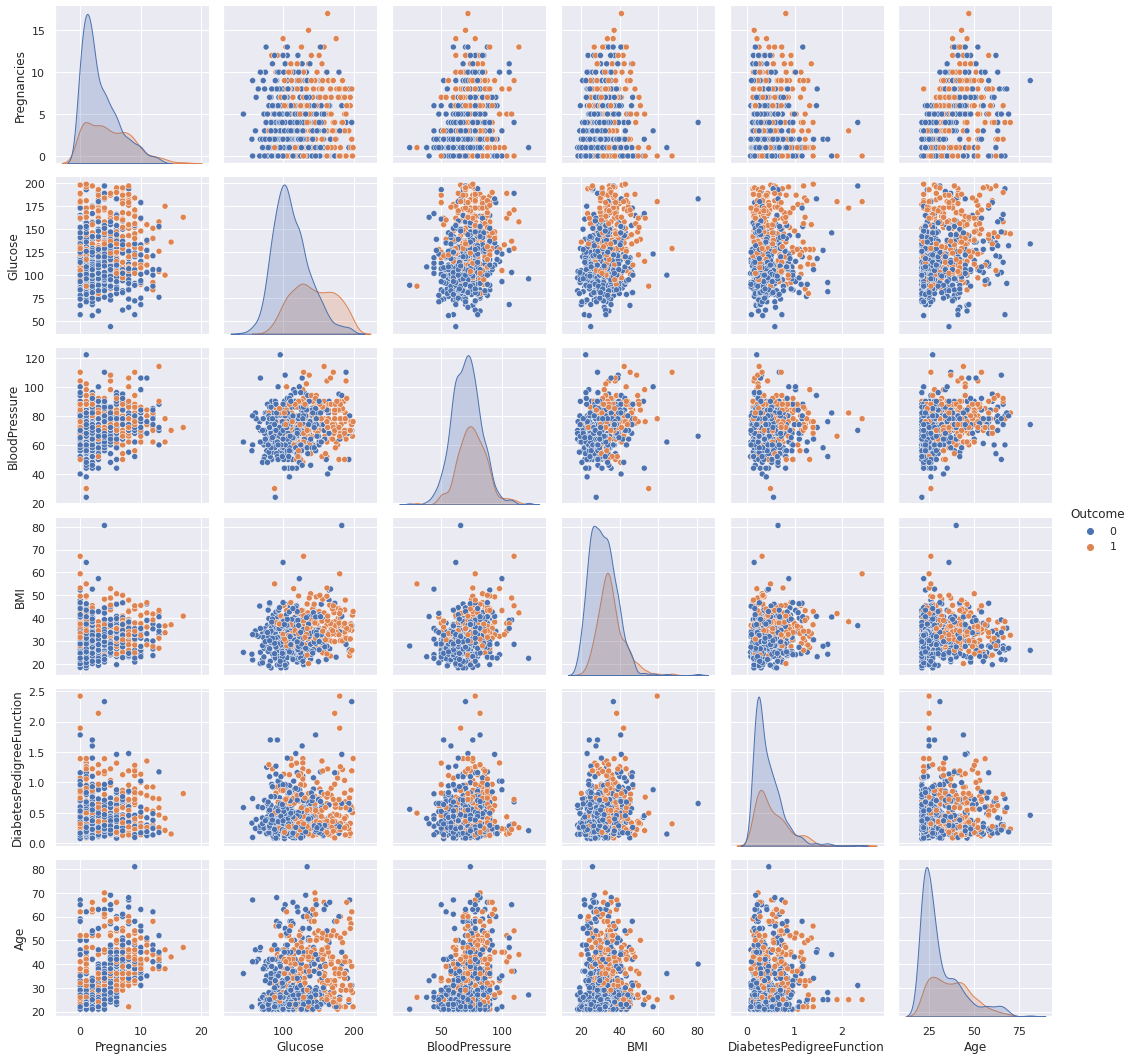

In [44]:
p=sns.pairplot(diabetes_data, hue = 'Outcome')

Correlation between various features


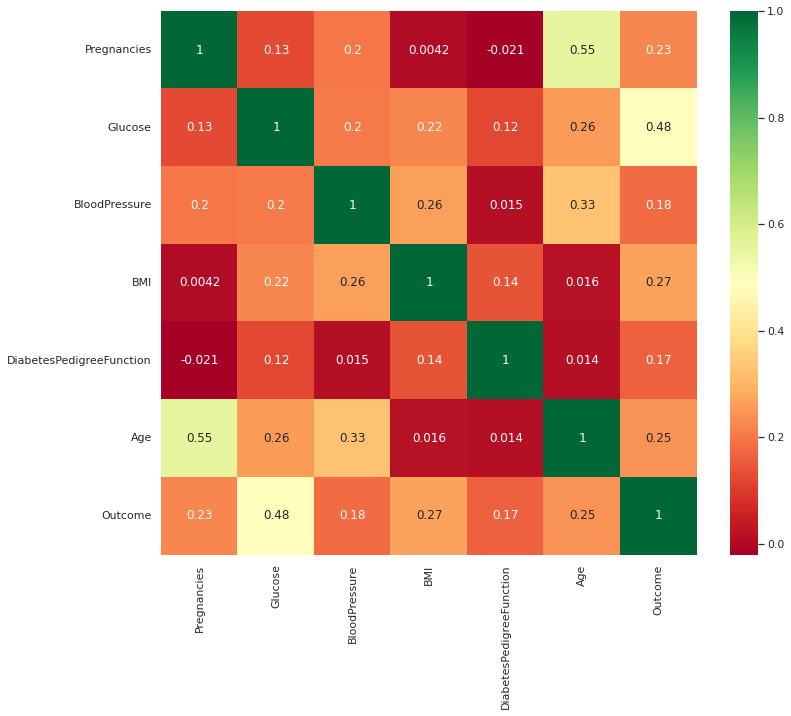

In [45]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')

In [46]:
# independent variable
x = diabetes_data.iloc[ : , : -1]

# dependent variable
y = diabetes_data.Outcome

In [47]:
#แบ่งค่าเป็น training set และ test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=326)

#ส่วนโมเดล & วัดประสิทธิภาพ
model = LogisticRegression(max_iter=120)
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print(f"The model correctly classifies with {score*100:.2f}% accuracy.")
y_pred = model.predict(x_test)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm

The model correctly classifies with 80.95% accuracy.


,0,1
0,239,25
1,47,67


In [48]:
print(f"The model predicts disease with the following accuracy:\n\n\
Healthy people - classified as\n\t\
No disease = {cm[0][0]}/{cm.loc[0].sum()}\n\tDisease = {cm[1][0]}/{cm.loc[0].sum()}\n\n\
\
Sick people - diabetic - classified as\n\t\
No disease = {cm[0][1]}/{cm.loc[1].sum()}\n\tDisease = {cm[1][1]}/{cm.loc[1].sum()}")

The model predicts disease with the following accuracy:

Healthy people - classified as
	No disease = 239/264
	Disease = 25/264

Sick people - diabetic - classified as
	No disease = 47/114
	Disease = 67/114


In [54]:
# Pregnancies: Number of times pregnant
#PREGNANCIES = int(diabetes_data.Pregnancies.mean())
PREGNANCIES = int(input("PREGNANCIES : "))

# Plasma glucose concentration over 2 hours in an oral glucose tolerance test 
#GLUCOSE = int(diabetes_data.Glucose.mean())
GLUCOSE = int(input("GLUCOSE : "))

# Diastolic blood pressure (mm Hg)
#BLOODPRESSURE = int(diabetes_data.BloodPressure.mean())
BLOODPRESSURE = int(input("BLOODPRESSURE : "))

# Body mass index (weight in kg/(height in m)2)
#BMI = diabetes_data.BMI.mean()
BMI = float(input("BMI : "))

# DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
#DIABETESPEDIGREEFUNCTION = diabetes_data.DiabetesPedigreeFunction.mean()
DIABETESPEDIGREEFUNCTION = float(input("DIABETESPEDIGREEFUNCTION : "))

# Age (years)
#AGE = int(diabetes_data.Age.mean())
AGE = int(input("AGE : "))


PREGNANCIES : 0
GLUCOSE : 201
BLOODPRESSURE : 87
BMI : 37.6555
DIABETESPEDIGREEFUNCTION : 0.01274
AGE : 19


In [55]:
sample = {
    'Pregnancies': PREGNANCIES, 
    'Glucose': GLUCOSE, 
    'Bloodpressure': BLOODPRESSURE, 
    'Bmi': BMI, 
    'Diabetespedigreefunction': DIABETESPEDIGREEFUNCTION, 
    'Age':AGE,
}

In [56]:
if None in sample.values():
    print("Please do not leave any variable with the 'None' value.")
else:
    trial = pd.DataFrame.from_dict(data=sample, orient='index').T
    print(f"Outcome: {model.predict(trial)[0]} - (0 if non-diabetic, 1 if diabetic)")
    print(f"The probability of no disease {model.predict_proba(trial)[0][0]*100:.2f}%\nThe probability of disease {model.predict_proba(trial)[0][1]*100:.2f}%")

Outcome: 1 - (0 if non-diabetic, 1 if diabetic)
The probability of no disease 28.56%
The probability of disease 71.44%
